# **1B. Noise in signals**
<a target="_blank" href="https://colab.research.google.com/github/23wc01/CMPSC7540/blob/main/HW4/1B_Noise_in_signals.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Sources
* https://colab.research.google.com/drive/1ZvRW-LBLhxFeSp_6a6T--HuP2GxAmFVK#scrollTo=pnvY7OJQMZ1d
* https://docs.scipy.org/doc/scipy/reference/stats.html
* https://en.wikipedia.org/wiki/Colors_of_noise
* https://deepai.org/machine-learning-glossary-and-terms/white-noise
* https://vitomirj.medium.com/brownian-motion-or-random-walk-1dc8914c745
* https://en.wikipedia.org/wiki/Pink_noise#:~:text=Within%20the%20scientific%20literature%2C%20the,the%20square%20root%20of%20frequency

# **Installs & Imports**

In [30]:
!pip install colorednoise -q

In [31]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import colorednoise

# **Time series properties**

In [32]:
fs = 1000 # 1000 Hz sampling frequency of time series
N = 10000 # Length of time series (10 sec)
time = np.arange(N) / fs * 1000 # time points in milliseconds

# **Generation of noise**

## White noise
 Describes random signal with constant power throughout given frequency band.  density.

 X(t) = white noise if Sx(f) is constant for all frequencies.
 N0/2 = the constant

### *Equations*
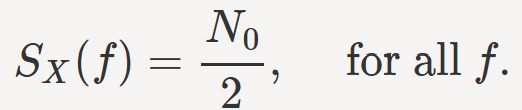

---
### *Characteristics*
* Stationary - White noise's mean & variance don't change over time
* Independence - Random vars are independent of each other so no predictable structure/pattern in noise values
* Equal power spectrum - Power distributed across all frequencies in given range
* Gaussian/uniform distribution - Often follows Gaussian/uniform distribution, where mean = 0 & variance is finite.




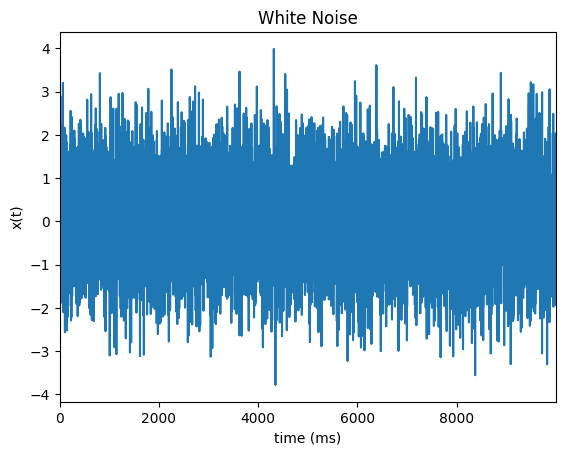

In [33]:
white_noise = norm.rvs(size=N)
plt.figure()
plt.plot(time, white_noise)
plt.xlim(time[[0, -1]]) # Show first 500 ms
plt.xlabel("time (ms)")
plt.ylabel("x(t)")
plt.title("White Noise")
plt.show()

## Brownian noise (a.k.a. random walk noise)

### *Equations*
frequency density proportional to 1/f²
Individual brownian motion trajectory = spectrum S(w)= S_0/w²

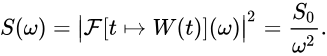

Brownian motion = integral of white noise signal.

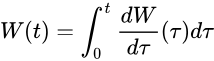
---
### *Characteristics*
* Last step - Brownian noise/random walk noise is white noise that has memory of last step. So not a purely "random walk" in that it's dependent on last taken step.
* Brownian motion - Random movement of microscopic particles in liquid/gas. Temperature of substance proportional to avg kinetic energy of molecules in substance

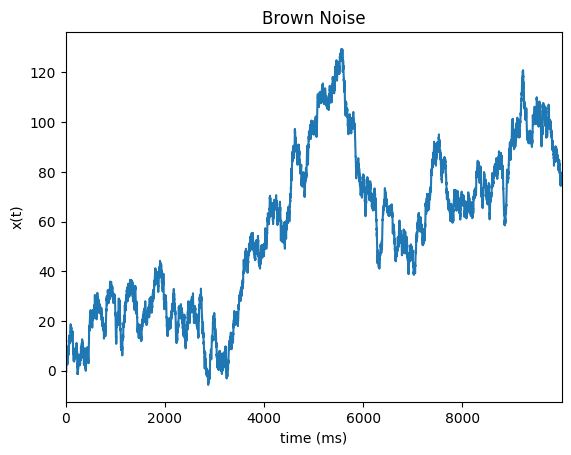

In [34]:
brown_noise = np.cumsum(white_noise)
plt.figure()
plt.plot(time, brown_noise)
plt.xlim(time[[0, -1]]) # Show first 500 ms
plt.xlabel("time (ms)")
plt.ylabel("x(t)")
plt.title("Brown Noise")
plt.show()

## Pink noise
### *Equations*
S(f) = 1 / f^α

f = frequency

α = Usually 1

---
### *Characteristics*
* Power law distribution - Power decreases as frequency increases, following 1/f relationship.
* α value - Usually 1 for classic pink noise where each octave of the frequency spectrum has equal energy
* uses white noise - Generate pink noise by dividing its amplitude w/ frequency to create signal w/ 1/f power distribution.


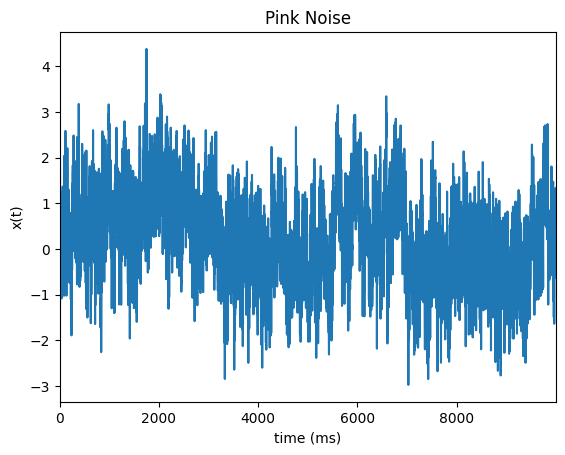

In [35]:
α = 1
pink_noise = colorednoise.powerlaw_psd_gaussian(α, N)
plt.figure()
plt.plot(time, pink_noise)
plt.xlim(time[[0, -1]]) # Show first 500 ms
plt.xlabel("time (ms)")
plt.ylabel("x(t)")
plt.title("Pink Noise")
plt.show()